<div style="text-align:center"><span style="color:green; font-family:Georgia; font-size:3.5em;">Use of Classification Algorithms in Bank Customer Churn </span></div>

In this project, I will create a model to solve the Bank Customer Churn problem using classification algorithms.

### Loading Necessary Modules

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
from sklearn import preprocessing
from IPython.display import Latex
%matplotlib inline

### Data:
This is a data from ABC bank where more and more customers are leaving their credit card services. I would like to predict who is going to get churned. I talked with the manager the bank and he sent me a data set which  consists of 10,000 customers at the bank with around 19 variables of different types mentioning their age, salary, marital status, credit card limit, credit card category, etc.

The data source and data description can be found at:

https://leaps.analyttica.com/sample_cases/11


|Variable | Type |Description|
----------|------|-----------|
|Clientnum |Num|Client number. Unique identifier for the customer holding the account|
|Attrition_Flag|char|Internal event (customer activity) variable - if the account is closed then 1 else 0|
|Customer_Age |Num|Demographic variable - Customer's Age in Years|
|Gender | Char |Demographic variable - M=Male, F=Female|
|Dependent_count|Num|Demographic variable - Number of dependents|
|Education_Level|Char|Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)|
|Marital_Status|Char |Demographic variable - Married, Single, Unknown|
|Income_Category|Char|Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown)|
|Card_Category|Char|Product Variable - Type of Card (Blue, Silver, Gold, Platinum)|
|Months_on_book|Num|Months on book (Time of Relationship)|
|Total_Relationship_Count|Num|Total no of products held by the customer|
|Months_Inactive_12_mon|Num|No of months inactive in the last 12 months|
|Contacts_Count_12_mon|Num|No of Contacts in the last 12 months|
|Credit_Limit|Num|Credit Limit on the Credit Card|
|Total_Revolving_Bal|Num|Total Revolving Balance on the Credit Card|
|Avg_Open_To_Buy|Num|Open to Buy Credit Line (Average of last 12 months)
|Total_Amt_Chng_Q4_Q1|Num|Change in Transaction Amount (Q4 over Q1) |
|Total_Trans_Amt|Num|Total Transaction Amount (Last 12 months)|
|Total_Trans_Ct|Num|Total Transaction Count (Last 12 months)|
|Total_Ct_Chng_Q4_Q1|Num|Change in Transaction Count (Q4 over Q1)|
|Avg_Utilization_Ratio|Num|Average Card Utilization Ratio|


### Loading the Bank Churn Data

In [2]:
bank = pd.read_csv('BankChurners.csv')
bank.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
#Getting the shape of the data
bank.shape

(10127, 21)

In [4]:
# Call the info method on bank to see a summary of the data
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

### Setting index to 'CLIENTNUM'

In [5]:
bank.set_index('CLIENTNUM', inplace=True)
bank.sample(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
816315558,Existing Customer,38,M,1,High School,Single,$60K - $80K,Blue,33,5,4,1,1503.0,879,624.0,0.776,4439,77,0.604,0.585
714031083,Attrited Customer,46,F,3,Graduate,Unknown,Unknown,Blue,30,3,2,1,8869.0,0,8869.0,0.413,1935,40,0.429,0.000
713904708,Existing Customer,40,F,3,Graduate,Married,Less than $40K,Blue,36,6,1,3,7582.0,1942,5640.0,0.823,4926,85,0.635,0.256
713037333,Existing Customer,63,M,1,Graduate,Single,$80K - $120K,Blue,55,6,1,2,21430.0,0,21430.0,0.511,3561,57,0.676,0.000
780390108,Existing Customer,44,F,3,College,Married,$40K - $60K,Blue,34,3,1,2,3256.0,1013,2243.0,0.988,5079,81,0.841,0.311
720317658,Existing Customer,43,M,2,Graduate,Single,$80K - $120K,Blue,35,2,2,2,5858.0,961,4897.0,0.657,7916,82,0.708,0.164
804577833,Existing Customer,44,F,2,Graduate,Married,Less than $40K,Blue,39,5,1,0,6861.0,2101,4760.0,0.464,3974,63,0.909,0.306
818908833,Existing Customer,46,M,3,Graduate,Married,$40K - $60K,Blue,41,5,2,2,2564.0,0,2564.0,1.026,2038,45,0.364,0.000
787638408,Existing Customer,47,F,1,High School,Single,Unknown,Blue,40,5,4,4,8440.0,2087,6353.0,0.804,4161,74,0.644,0.247


### Checking for dupllicate rows

In [6]:
duplicate = bank[bank.duplicated()]  
print("Duplicate Rows :")  
duplicate 

Duplicate Rows :


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,


This shows that none of the row in the data set is duplicate.

### Checking for the missing values

In [7]:
# Missing NA values
bank.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There is no missing data.

### Categorical Features

In [8]:
# Using `select_dtypes` method to select columns of dtype 'object'
bank.select_dtypes('object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
CLIENTNUM,,,,,,
768805383,Existing Customer,M,High School,Married,$60K - $80K,Blue
818770008,Existing Customer,F,Graduate,Single,Less than $40K,Blue
713982108,Existing Customer,M,Graduate,Married,$80K - $120K,Blue
769911858,Existing Customer,F,High School,Unknown,Less than $40K,Blue
709106358,Existing Customer,M,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...,...,...
772366833,Existing Customer,M,Graduate,Single,$40K - $60K,Blue
710638233,Attrited Customer,M,Unknown,Divorced,$40K - $60K,Blue
716506083,Attrited Customer,F,High School,Married,Less than $40K,Blue


In [9]:
# Countinig the categories of the  Feature 'Attrition_Flag'
bank['Attrition_Flag'].value_counts().to_frame()

,Attrition_Flag
Existing Customer,8500
Attrited Customer,1627


### Target Variable:
We are going to find who is going to get churned. This means who is not going to continue as customer. So our target variable in this problem is 'Attrition_Flag', which is a categoeical variable with categories 'Existing Customer' and 'Attrited Customer'.

### Dealing with 'Unknown' values
We saw above some of the data values are 'Unknown'. Lets deal with unknown values.

In [10]:
(bank == 'Unknown').sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [11]:
# Countinig the categories of the  Feature 'Education_Level'
bank['Education_Level'].value_counts().to_frame()

,Education_Level
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [12]:
# Countinig the categories of the  Feature 'Marital_Status'
bank['Marital_Status'].value_counts().to_frame()

,Marital_Status
Married,4687
Single,3943
Unknown,749
Divorced,748


In [13]:
# Countinig the categories of the  Feature 'Income_Category'
bank['Income_Category'].value_counts().to_frame()

,Income_Category
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In the case of 'Education_Level', 'Marital_Status' and 'Income_Category',  the most frequent values or modal values are 'Graduate', 'Married' and 'Less than $40K' respectivly. So we replace the 'Unknown' values of those variables by most frequent categories.

In [14]:
bank['Education_Level'].replace({'Unknown': 'Graduate'} , inplace = True)
bank['Marital_Status'].replace({'Unknown': 'Married'} , inplace = True)
bank['Income_Category'].replace({'Unknown': 'Less than $40K'} , inplace = True)

In [15]:
# Again Checking for 'Unknown' values
(bank == 'Unknown').sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [16]:
bank.sample(10)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
719266158,Existing Customer,42,M,2,Graduate,Divorced,$80K - $120K,Blue,35,5,3,1,6779.0,1359,5420.0,0.737,3434,65,0.512,0.200
804840033,Existing Customer,45,M,2,College,Married,$60K - $80K,Blue,38,4,6,4,16611.0,0,16611.0,0.954,1960,48,0.600,0.000
719019483,Existing Customer,46,F,2,College,Married,Less than $40K,Silver,36,2,3,1,13427.0,1507,11920.0,0.840,4266,63,0.750,0.112
770824833,Existing Customer,32,M,1,Graduate,Divorced,$40K - $60K,Blue,19,2,3,5,3657.0,1135,2522.0,0.795,16236,94,0.808,0.310
713992158,Existing Customer,57,F,4,Graduate,Married,Less than $40K,Blue,36,3,1,2,2159.0,1004,1155.0,0.603,1353,30,0.111,0.465
711516783,Existing Customer,47,F,4,Uneducated,Married,$40K - $60K,Blue,36,2,1,1,2155.0,1119,1036.0,0.815,5441,91,0.717,0.519
819634233,Attrited Customer,46,F,2,Graduate,Married,Less than $40K,Blue,40,5,2,2,6568.0,0,6568.0,0.101,1507,33,0.222,0.000
712142733,Existing Customer,37,F,3,Post-Graduate,Married,Less than $40K,Blue,26,5,3,2,1910.0,1164,746.0,0.744,2028,39,1.053,0.609
720967233,Existing Customer,43,F,2,Graduate,Married,Less than $40K,Blue,29,4,1,1,3327.0,2517,810.0,0.793,4901,88,0.913,0.757


In [17]:
# Countinig the categories of the  Feature 'Gender'
bank['Gender'].value_counts().to_frame()

,Gender
F,5358
M,4769


In [18]:
# Countinig the categories of the  Feature 'Education_Level'
bank['Education_Level'].value_counts().to_frame()

,Education_Level
Graduate,4647
High School,2013
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [19]:
# Countinig the categories of the  Feature 'Marital_Status'
bank['Marital_Status'].value_counts().to_frame()

,Marital_Status
Married,5436
Single,3943
Divorced,748


In [20]:
# Countinig the categories of the  Feature 'Income_Category'
bank['Income_Category'].value_counts().to_frame()

,Income_Category
Less than $40K,4673
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
$120K +,727


In [21]:
# Countinig the categories of the  Feature 'Card_Category'
bank['Card_Category'].value_counts().to_frame()

,Card_Category
Blue,9436
Silver,555
Gold,116
Platinum,20


### Numeric Features

In [22]:
bank.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [23]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


There is a big variation in  some features like 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt' and 'Total_Trans_Ct'. We should check for the outliers of these features.

### Distributions Of Feature Values

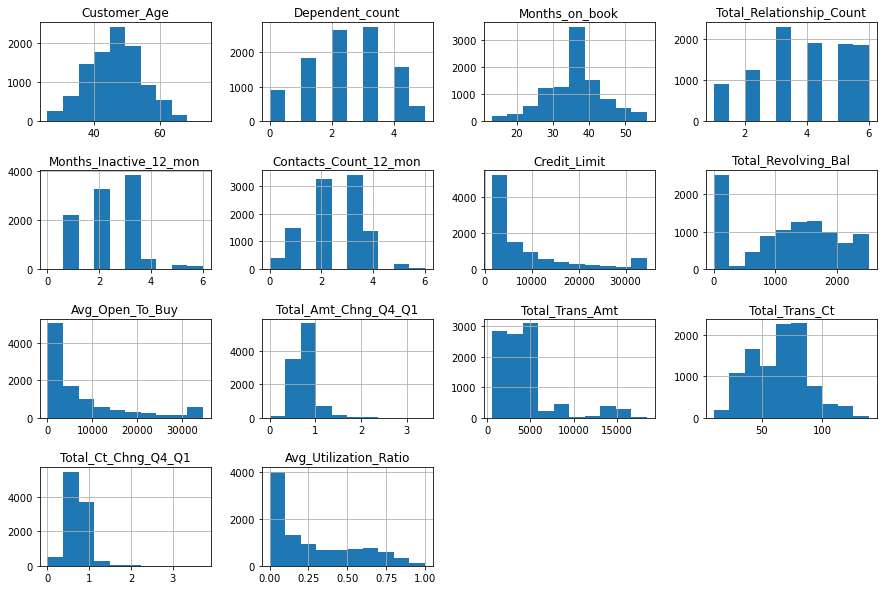

In [24]:
#Calling `hist` method to plot histograms of each of the numeric features for data bank
bank.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
plt.show()

This feature distribution also shows the outliers for the features we talked before.

#### Dealing with Outliers

In [25]:
bank.quantile([0.0, 0.05, .25,.5, .75, .95, 1]).T

,0.00,0.05,0.25,0.50,0.75,0.95,1.00
Customer_Age,26.0,33.000,41.000,46.000,52.000,60.000,73.000
Dependent_count,0.0,0.000,1.000,2.000,3.000,4.000,5.000
Months_on_book,13.0,22.000,31.000,36.000,40.000,50.000,56.000
Total_Relationship_Count,1.0,1.000,3.000,4.000,5.000,6.000,6.000
Months_Inactive_12_mon,0.0,1.000,2.000,2.000,3.000,4.000,6.000
Contacts_Count_12_mon,0.0,1.000,2.000,2.000,3.000,4.000,6.000
Credit_Limit,1438.3,1438.510,2555.000,4549.000,11067.500,34516.000,34516.000
Total_Revolving_Bal,0.0,0.000,359.000,1276.000,1784.000,2517.000,2517.000
Avg_Open_To_Buy,3.0,480.300,1324.500,3474.000,9859.000,32183.400,34516.000
Total_Amt_Chng_Q4_Q1,0.0,0.463,0.631,0.736,0.859,1.103,3.397


In [26]:
# Calculating outlier
Q1 = bank.quantile(0.25)
Q3 = bank.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print('Lower Bound:\n', lower_bound)
print('Upper Bound:\n', upper_bound)

Lower Bound:
 Customer_Age                   24.500
Dependent_count                -2.000
Months_on_book                 17.500
Total_Relationship_Count        0.000
Months_Inactive_12_mon          0.500
Contacts_Count_12_mon           0.500
Credit_Limit               -10213.750
Total_Revolving_Bal         -1778.500
Avg_Open_To_Buy            -11477.250
Total_Amt_Chng_Q4_Q1            0.289
Total_Trans_Amt             -1722.750
Total_Trans_Ct                 -9.000
Total_Ct_Chng_Q4_Q1             0.228
Avg_Utilization_Ratio          -0.697
dtype: float64
Upper Bound:
 Customer_Age                   68.500
Dependent_count                 6.000
Months_on_book                 53.500
Total_Relationship_Count        8.000
Months_Inactive_12_mon          4.500
Contacts_Count_12_mon           4.500
Credit_Limit                23836.250
Total_Revolving_Bal          3921.500
Avg_Open_To_Buy             22660.750
Total_Amt_Chng_Q4_Q1            1.201
Total_Trans_Amt              8619.250
Total_T

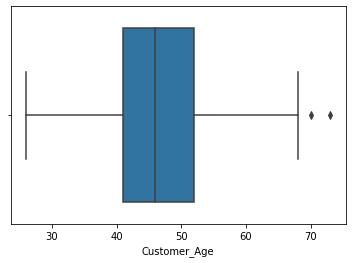

In [27]:
sns.boxplot(x=bank['Customer_Age'])
plt.show()

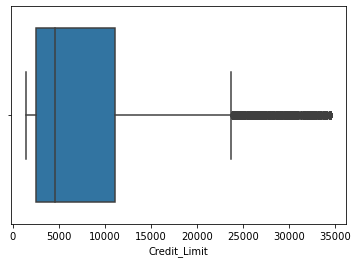

In [28]:
sns.boxplot(x=bank['Credit_Limit'])
plt.show()

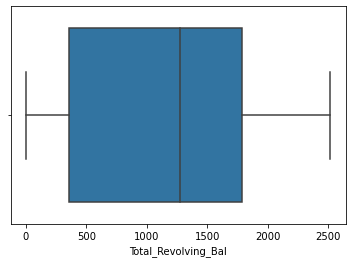

In [29]:
sns.boxplot(x=bank['Total_Revolving_Bal'])
plt.show()

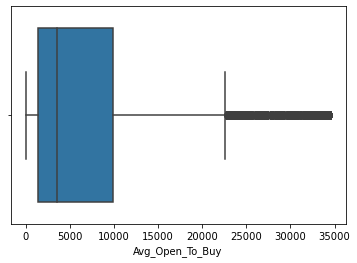

In [30]:
sns.boxplot(x=bank['Avg_Open_To_Buy'])
plt.show()

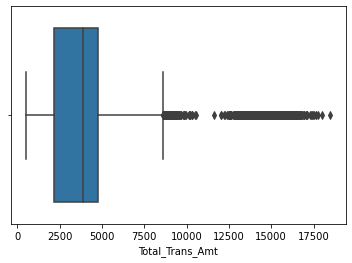

In [31]:
sns.boxplot(x=bank['Total_Trans_Amt'])
plt.show()

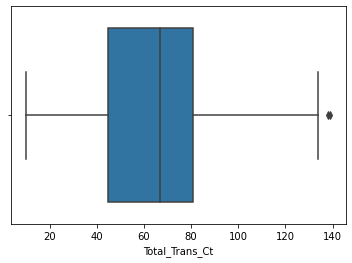

In [32]:
sns.boxplot(x=bank['Total_Trans_Ct'])
plt.show()

There is big issue with 'Credit_Limit', 'Avg_Open_To_Buy' and 'Total_Trans_Amt'.

### Comparision of upper bound with Max value

In [33]:
compare=pd.DataFrame({'Upper_Bound': upper_bound, '99th_Percentile': bank.quantile(1)})
compare

,Upper_Bound,99th_Percentile
Customer_Age,68.500,73.000
Dependent_count,6.000,5.000
Months_on_book,53.500,56.000
Total_Relationship_Count,8.000,6.000
Months_Inactive_12_mon,4.500,6.000
Contacts_Count_12_mon,4.500,6.000
Credit_Limit,23836.250,34516.000
Total_Revolving_Bal,3921.500,2517.000
Avg_Open_To_Buy,22660.750,34516.000
Total_Amt_Chng_Q4_Q1,1.201,3.397


In [34]:
bank.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [35]:
bank.shape

(10127, 20)

### Replacing the outliers by upper bounds

In [36]:
# Replacing 'Customer_Age' > 68 by 68
bank['Customer_Age'] = np.where(bank['Customer_Age'] > 68, 68, bank['Customer_Age'])
# Replacing 'Credit_Limit' > 68 by 68
bank['Credit_Limit'] = np.where(bank['Credit_Limit'] > 23836, 23836, bank['Credit_Limit'])
# Replacing 'Avg_Open_To_Buy' > 68 by 68
bank['Avg_Open_To_Buy'] = np.where(bank['Avg_Open_To_Buy'] > 22660, 22660, bank['Avg_Open_To_Buy'])
# Replacing 'Total_Trans_Amt' > 68 by 68
bank['Total_Trans_Amt'] = np.where(bank['Total_Trans_Amt'] > 8619, 8619, bank['Total_Trans_Amt'])
# Replacing 'Customer_Age' > 68 by 68
bank['Total_Trans_Ct'] = np.where(bank['Total_Trans_Ct'] > 135, 135, bank['Total_Trans_Ct'])


In [37]:
bank.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [38]:
bank.shape

(10127, 20)

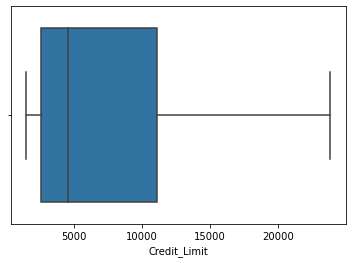

In [39]:
sns.boxplot(x=bank['Credit_Limit'])
plt.show()

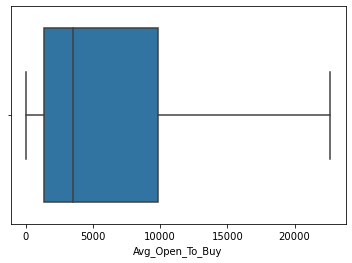

In [40]:
sns.boxplot(x=bank['Avg_Open_To_Buy'])
plt.show()

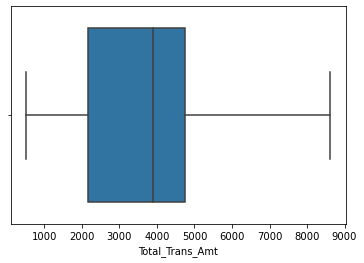

In [41]:
sns.boxplot(x=bank['Total_Trans_Amt'])
plt.show()

##### Now the data looks good.

### Exploratory Data Analysis

In [42]:
bank['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

16% of the customers are gone to churn.

In [43]:
bank.groupby(['Gender'])['Attrition_Flag'].value_counts()

Gender  Attrition_Flag   
F       Existing Customer    4428
        Attrited Customer     930
M       Existing Customer    4072
        Attrited Customer     697
Name: Attrition_Flag, dtype: int64

In [44]:
bank.groupby(['Gender'])['Attrition_Flag'].value_counts(normalize=True)

Gender  Attrition_Flag   
F       Existing Customer    0.826428
        Attrited Customer    0.173572
M       Existing Customer    0.853848
        Attrited Customer    0.146152
Name: Attrition_Flag, dtype: float64

17 % of the female and 15 % of the male custumers are churned.

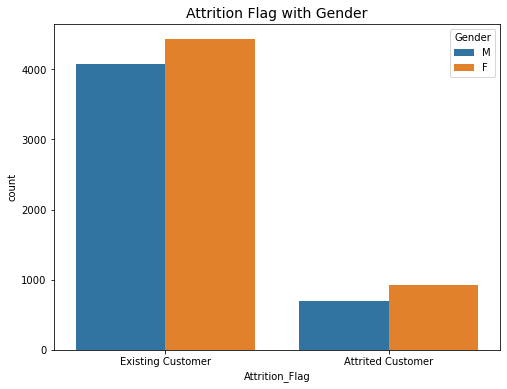

In [45]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Attrition_Flag', hue = 'Gender', data=bank)
plt.title('Attrition Flag with Gender', fontsize = 14)
plt.show()

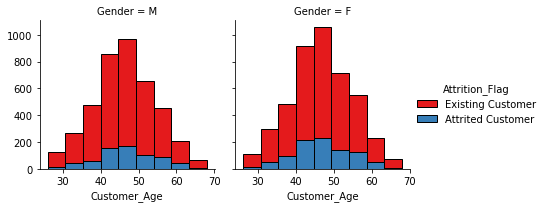

In [46]:
bins = np.linspace(bank.Customer_Age.min(), bank.Customer_Age.max(), 10)
g = sns.FacetGrid(bank, col="Gender", hue="Attrition_Flag", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Customer_Age', bins=bins, ec="k")

g.add_legend()
plt.show()

Most of the churned customers are of age 40 - 50.

In [47]:
bank.groupby(['Marital_Status'])['Attrition_Flag'].value_counts(normalize=True)

Marital_Status  Attrition_Flag   
Divorced        Existing Customer    0.838235
                Attrited Customer    0.161765
Married         Existing Customer    0.845843
                Attrited Customer    0.154157
Single          Existing Customer    0.830586
                Attrited Customer    0.169414
Name: Attrition_Flag, dtype: float64

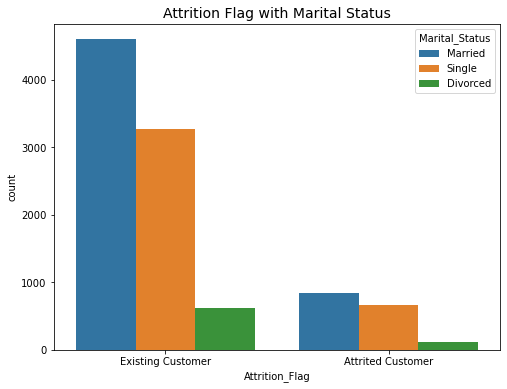

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Attrition_Flag', hue = 'Marital_Status', data=bank)
plt.title('Attrition Flag with Marital Status', fontsize = 14)
plt.show()

Divorced and Single customers have higher churned rate.

In [49]:
bank.groupby(['Education_Level'])['Attrition_Flag'].value_counts(normalize=True)

Education_Level  Attrition_Flag   
College          Existing Customer    0.847976
                 Attrited Customer    0.152024
Doctorate        Existing Customer    0.789357
                 Attrited Customer    0.210643
Graduate         Existing Customer    0.840112
                 Attrited Customer    0.159888
High School      Existing Customer    0.847988
                 Attrited Customer    0.152012
Post-Graduate    Existing Customer    0.821705
                 Attrited Customer    0.178295
Uneducated       Existing Customer    0.840619
                 Attrited Customer    0.159381
Name: Attrition_Flag, dtype: float64

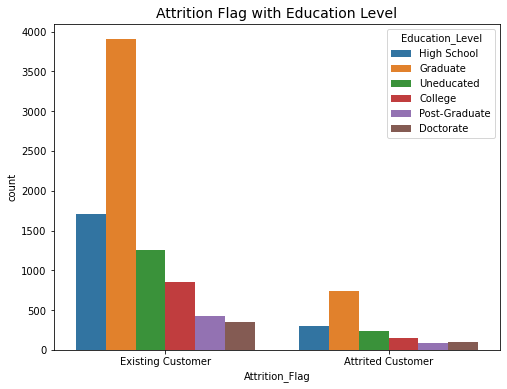

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Attrition_Flag', hue = 'Education_Level', data=bank)
plt.title('Attrition Flag with Education Level', fontsize = 14)
plt.show()

In [51]:
bank.groupby(['Income_Category'])['Attrition_Flag'].value_counts(normalize=True)

Income_Category  Attrition_Flag   
$120K +          Existing Customer    0.826685
                 Attrited Customer    0.173315
$40K - $60K      Existing Customer    0.848603
                 Attrited Customer    0.151397
$60K - $80K      Existing Customer    0.865193
                 Attrited Customer    0.134807
$80K - $120K     Existing Customer    0.842345
                 Attrited Customer    0.157655
Less than $40K   Existing Customer    0.829018
                 Attrited Customer    0.170982
Name: Attrition_Flag, dtype: float64

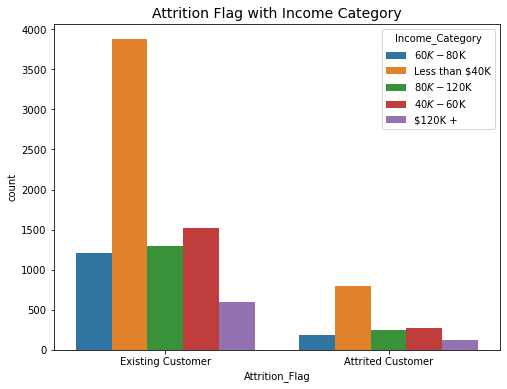

In [52]:
plt.figure(figsize=(8, 6))
sns.countplot(x = 'Attrition_Flag', hue = 'Income_Category', data=bank)
plt.title('Attrition Flag with Income Category', fontsize = 14)
plt.show()

Customers with income level less than 40K have higher churned rate.

In [53]:
bank.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Married,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### One Hot Encoding

Use one hot encoding technique to convert categorical variables 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category' and 'Card_Category' to binary variables and append them to the features Dataframe.

In [54]:
df = bank.drop(['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], axis=1)

In [55]:
df = pd.concat([df, pd.get_dummies(bank[['Gender', 'Education_Level', 
                                        'Marital_Status', 'Income_Category', 'Card_Category']])], axis=1)
df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,3,39,5,1,3,12691.0,777,11914.0,...,0,0,0,1,0,0,1,0,0,0
818770008,Existing Customer,49,5,44,6,1,2,8256.0,864,7392.0,...,1,0,0,0,0,1,1,0,0,0
713982108,Existing Customer,51,3,36,4,1,0,3418.0,0,3418.0,...,0,0,0,0,1,0,1,0,0,0
769911858,Existing Customer,40,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,0,0,1,1,0,0,0
709106358,Existing Customer,40,3,21,5,1,0,4716.0,0,4716.0,...,0,0,0,1,0,0,1,0,0,0


In [56]:
df.shape

(10127, 35)

### Standardizing Data
Data Standardization gives the data with zero mean and unit variance (technically it should be done after train test split).

In [57]:
X = df.drop(['Attrition_Flag'], axis=1 )
X[0:5]

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Marital_Status_Single,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
CLIENTNUM,,,,,,,,,,,,,,,,,,,,,
768805383,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,0,1,0,0,1,0,0,0
818770008,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,1,0,0,0,0,1,1,0,0,0
713982108,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,0,1,0,1,0,0,0
769911858,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,0,1,1,0,0,0
709106358,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,0,1,0,0,1,0,0,0


In [58]:
# Target variable
y = df['Attrition_Flag'].values
y[0:5]

array(['Existing Customer', 'Existing Customer', 'Existing Customer',
       'Existing Customer', 'Existing Customer'], dtype=object)

In [59]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:2]

array([[-0.1653616 ,  0.50336813,  0.38462088,  0.76394261, -1.32713603,
         0.49240377,  0.66633329, -0.47342222,  0.71900524,  2.62349444,
        -1.29720917, -0.97395363,  3.8340026 , -0.77588223, -1.05995565,
         1.05995565, -0.33338819, -0.21589388, -0.92086519,  2.00768518,
        -0.23170775, -0.41485718, -0.2824051 ,  0.9289514 , -0.79850685,
        -0.27810147, -0.46336328,  2.49464476, -0.42267548, -0.92563618,
         0.27061076, -0.10764411, -0.044484  , -0.24079371],
       [ 0.33374186,  2.04319867,  1.01071482,  1.40730617, -1.32713603,
        -0.41161598,  0.05178487, -0.36666682,  0.09295202,  3.56329284,
        -1.22921078, -1.35743344, 12.60857291, -0.61627565,  0.9434357 ,
        -0.9434357 , -0.33338819, -0.21589388,  1.08593528, -0.49808606,
        -0.23170775, -0.41485718, -0.2824051 , -1.07648258,  1.2523374 ,
        -0.27810147, -0.46336328, -0.40085868, -0.42267548,  1.08033806,
         0.27061076, -0.10764411, -0.044484  , -0.24079371]])

### Spliting the Data into Train and Test Set

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (8101, 34) (8101,)
Test set: (2026, 34) (2026,)


### Using Classification Algorithms

Now, it is time to use the training set to build an accurate model. Then use the test set to report the accuracy of the model. Our problem is to classify the customer whether it is churned or not. For this purpose I am going to use following classification Algorithm and identify one that is working the best.

Classification algorithms:
- Logistic Regression
- Naive Bayes
- K Nearest Neighbor(KNN)
-  Support Vector Machine
- Decision Tree
- Random Forest

## Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train,y_train)
LR

LogisticRegression()

In [62]:
yhat = LR.predict(X_test)
yhat

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Existing Customer', 'Existing Customer', 'Attrited Customer'],
      dtype=object)

### Importing metrics

In [63]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### Perfomance of the model LR

In [64]:
print (classification_report(y_test, yhat))

                   precision    recall  f1-score   support

Attrited Customer       0.76      0.61      0.68       316
Existing Customer       0.93      0.96      0.95      1710

         accuracy                           0.91      2026
        macro avg       0.85      0.79      0.81      2026
     weighted avg       0.90      0.91      0.91      2026



In [65]:
print("LR's Accuracy: ", round(accuracy_score(y_test, yhat),4)* 100, '%')

LR's Accuracy:  90.97 %


In [66]:
print("LR's F1-Score: ", round(f1_score(y_test, yhat,  average='weighted'),4)* 100, '%')

LR's F1-Score:  90.56 %


## Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB().fit(X_train,y_train)
NB

GaussianNB()

In [68]:
yhat = NB.predict(X_test)
yhat

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Existing Customer', 'Existing Customer', 'Existing Customer'],
      dtype='<U17')

### Perfomance of the model Naive Bayes

In [69]:
print (classification_report(y_test, yhat))

                   precision    recall  f1-score   support

Attrited Customer       0.64      0.55      0.59       316
Existing Customer       0.92      0.94      0.93      1710

         accuracy                           0.88      2026
        macro avg       0.78      0.74      0.76      2026
     weighted avg       0.87      0.88      0.88      2026



In [70]:
print("NB's Accuracy: ", round(accuracy_score(y_test, yhat),4)* 100, '%')

NB's Accuracy:  88.06 %


In [71]:
print("NB's F1-Score: ", round(f1_score(y_test, yhat,  average='weighted'),4)* 100, '%')

NB's F1-Score:  87.68 %


## K Nearest Neighbor (KNN)

Notice: You should find the best k to build the model with the best accuracy.

In [72]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
#Train Model and Predict  
kNN = KNeighborsClassifier().fit(X_train,y_train)
kNN

KNeighborsClassifier()

We can calculate the accuracy of KNN for different value of k and calculate the accuracy of the prediction. Then we choose the best k.

In [73]:
# Best k
Ks=15
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[];
for n in range(1,Ks):
    
    #Train Model and Predict  
    KNN = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat = KNN.predict(X_test)
    
    
    mean_acc[n-1]=np.mean(yhat==y_test);
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.85834156, 0.83316881, 0.8780849 , 0.86969398, 0.88302073,
       0.87907206, 0.87660415, 0.87907206, 0.8810464 , 0.88153998,
       0.87561698, 0.87907206, 0.8780849 , 0.87660415])

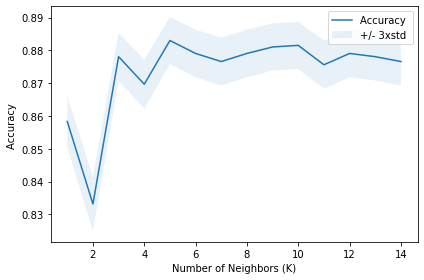

The best accuracy was 0.8830207305034551 with k =  5


In [74]:
plt.plot(range(1,Ks),mean_acc)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", mean_acc.max(), "with k = ", mean_acc.argmax()+1) 

neigh = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train, y_train)

In [75]:
# Building the model again, using k = 9
k = 5 
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNN

KNeighborsClassifier()

In [76]:
yhat = kNN.predict(X_test)
yhat

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Attrited Customer', 'Existing Customer', 'Attrited Customer'],
      dtype=object)

### Perfomance of the model KNN

In [77]:
print (classification_report(y_test, yhat))

                   precision    recall  f1-score   support

Attrited Customer       0.74      0.39      0.51       316
Existing Customer       0.90      0.97      0.93      1710

         accuracy                           0.88      2026
        macro avg       0.82      0.68      0.72      2026
     weighted avg       0.87      0.88      0.87      2026



In [78]:
print("KNN's Accuracy: ", round(accuracy_score(y_test, yhat),4)* 100, '%')

KNN's Accuracy:  88.3 %


In [79]:
print("KNN's F1-Score: ", round(f1_score(y_test, yhat,  average='weighted'),4)* 100, '%')

KNN's F1-Score:  86.71 %


## Support Vector Machine (SVM)

In [80]:
from sklearn import svm
SVM = svm.SVC().fit(X_train, y_train)
SVM

SVC()

In [81]:
yhat = SVM.predict(X_test)
yhat

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Existing Customer', 'Existing Customer', 'Attrited Customer'],
      dtype=object)

### Perfomance of the model SVM

In [82]:
print (classification_report(y_test, yhat))

                   precision    recall  f1-score   support

Attrited Customer       0.82      0.59      0.69       316
Existing Customer       0.93      0.98      0.95      1710

         accuracy                           0.92      2026
        macro avg       0.87      0.79      0.82      2026
     weighted avg       0.91      0.92      0.91      2026



In [83]:
print("SVM's Accuracy: ", round(accuracy_score(y_test, yhat),4)* 100, '%')

SVM's Accuracy:  91.66 %


In [84]:
print("SVM's F1-Score: ", round(f1_score(y_test, yhat,  average='weighted'),4)* 100, '%')

SVM's F1-Score:  91.10000000000001 %


## Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth = 4).fit(X_train,y_train)
DT

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [86]:
yhat = DT.predict(X_test)
yhat

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Attrited Customer', 'Existing Customer', 'Existing Customer'],
      dtype=object)

### Perfomance of the model Decision Tree

In [87]:
print (classification_report(y_test, yhat))

                   precision    recall  f1-score   support

Attrited Customer       0.82      0.65      0.73       316
Existing Customer       0.94      0.97      0.96      1710

         accuracy                           0.92      2026
        macro avg       0.88      0.81      0.84      2026
     weighted avg       0.92      0.92      0.92      2026



In [88]:
print("DT's Accuracy: ", round(accuracy_score(y_test, yhat),4)* 100, '%')

DT's Accuracy:  92.35 %


In [89]:
print("DT's F1-Score: ", round(f1_score(y_test, yhat,  average='weighted'),4)* 100, '%')

DT's F1-Score:  91.97 %


## Random Forest:

In [90]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 1000, random_state=1).fit(X_train, y_train)
RF

RandomForestClassifier(n_estimators=1000, random_state=1)

In [91]:
yhat = DT.predict(X_test)
yhat

array(['Existing Customer', 'Existing Customer', 'Existing Customer', ...,
       'Attrited Customer', 'Existing Customer', 'Existing Customer'],
      dtype=object)

### Perfomance of the model Ramdom Forest

In [92]:
print (classification_report(y_test, yhat))

                   precision    recall  f1-score   support

Attrited Customer       0.82      0.65      0.73       316
Existing Customer       0.94      0.97      0.96      1710

         accuracy                           0.92      2026
        macro avg       0.88      0.81      0.84      2026
     weighted avg       0.92      0.92      0.92      2026



In [93]:
print("RF's Accuracy: ", round(accuracy_score(y_test, yhat),4)* 100, '%')

RF's Accuracy:  92.35 %


In [94]:
print("RF's F1-Score: ", round(f1_score(y_test, yhat,  average='weighted'),4)* 100, '%')

RF's F1-Score:  91.97 %


## Accuracy index

In [95]:
# evaluate LR
LR_yhat = LR.predict(X_test)
A1 = round(accuracy_score(y_test, LR_yhat), 2)

# evaluate Naive Bayes
NB_yhat = NB.predict(X_test)
A2 = round(accuracy_score(y_test, NB_yhat), 2)

# evaluate KNN
KNN_yhat = KNN.predict(X_test)
A3 = round(accuracy_score(y_test, KNN_yhat), 2)

#evaluate SVM
SVM_yhat = SVM.predict(X_test)
A4 = round(accuracy_score(y_test, SVM_yhat), 2)

# evaluate Decision Trees
DT_yhat = DT.predict(X_test)
A5 = round(accuracy_score(y_test, DT_yhat), 2)


# evaluate Random Forest
RF_yhat = RF.predict(X_test)
A6 = round(accuracy_score(y_test, RF_yhat), 2)

Accuracy_Score_List = [A1, A2, A3, A4, A5, A6]
Accuracy_Score_List

[0.91, 0.88, 0.88, 0.92, 0.92, 0.95]

## F1 Score

In [96]:
# evaluate LR
LR_yhat = LR.predict(X_test)
FS1 = round(f1_score(y_test, LR_yhat, average='weighted'), 2)

# evaluate Naive Bayes
NB_yhat = NB.predict(X_test)
FS2 = round(f1_score(y_test, NB_yhat, average='weighted'), 2)

# evaluate KNN
KNN_yhat = KNN.predict(X_test)
FS3 = round(f1_score(y_test, KNN_yhat, average='weighted'), 2)

#evaluate SVM
SVM_yhat = SVM.predict(X_test)
FS4 = round(f1_score(y_test, SVM_yhat, average='weighted'), 2)

# evaluate Decision Trees
DT_yhat = DT.predict(X_test)
FS5 = round(f1_score(y_test, DT_yhat, average='weighted'), 2)


# evaluate Random Forest
RF_yhat = RF.predict(X_test)
FS6 = round(f1_score(y_test, RF_yhat, average='weighted'), 2)

F1_Score_List = [FS1, FS2, FS3, FS4, FS5, FS6]
F1_Score_List

[0.91, 0.88, 0.87, 0.91, 0.92, 0.95]

## Log Loss

In [97]:
# evaluate LR
LR_yhat_prob = LR.predict_proba(X_test)
LS1 = round(log_loss(y_test, LR_yhat_prob), 2)

# evaluate Naive Bayes
NB_yhat_prob = NB.predict_proba(X_test)
LS2 = round(log_loss(y_test, NB_yhat_prob), 2)

# evaluate KNN
KNN_yhat_prob = KNN.predict_proba(X_test)
LS3 = round(log_loss(y_test, KNN_yhat_prob), 2)

#evaluate SVM
LS4 = 'NA'

# evaluate Decision Trees
DT_yhat_prob = DT.predict_proba(X_test)
LS5 = round(log_loss(y_test, DT_yhat_prob), 2)


# evaluate Random Forest
RF_yhat_prob = RF.predict_proba(X_test)
LS6 = round(log_loss(y_test, RF_yhat_prob), 2)

Log_loss_List = [LS1, LS2, LS3, LS4, LS5, LS6]
Log_loss_List

[0.21, 0.48, 1.43, 'NA', 0.22, 0.14]

In [98]:
# fomulate the report format
Report = pd.DataFrame(Accuracy_Score_List, 
                      index=['Logistic Regression', 'Naive Bayes','KNN','SVM',
                             'Decision Tree','Random Forest'])
Report.columns = ['Accuracy Score']
Report.insert(loc=1, column='F1-score', value=F1_Score_List)
Report.insert(loc=2, column='LogLoss', value=Log_loss_List)
Report.columns.name = 'Algorithm'
Report

Algorithm,Accuracy Score,F1-score,LogLoss
Logistic Regression,0.91,0.91,0.21
Naive Bayes,0.88,0.88,0.48
KNN,0.88,0.87,1.43
SVM,0.92,0.91,NA
Decision Tree,0.92,0.92,0.22
Random Forest,0.95,0.95,0.14


## Conclusion:

The report table shows the Random Forest 'FR' is more consistant and works better than the others. .We can use Random Forest 'FR' to predict the data with accuracy of more than 95%.